In [96]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
data = pd.read_csv('CarPrice_Assignment.csv')

data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
print(f'Number of rows: {data.shape[0]} \nNumber of columns: {data.shape[1]}')

Number of rows: 205 
Number of columns: 26


In [8]:
pd.DataFrame(data.dtypes, columns=['Datatype'])

,Datatype
car_ID,int64
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64


In [9]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
data['manufacturer'] = data['CarName'].apply(lambda x: x.split(' ')[0])
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,manufacturer
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


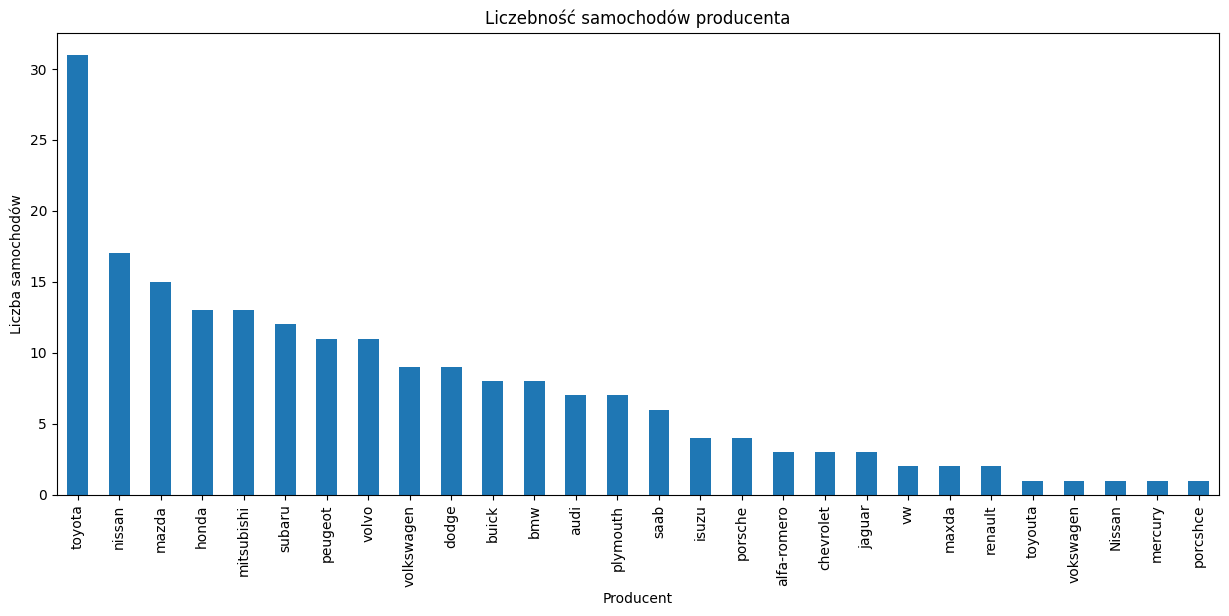

In [13]:
plt.figure(figsize=(15, 6))
data['manufacturer'].value_counts().plot(kind='bar')
plt.title('Liczebność samochodów producenta')
plt.xlabel('Producent')
plt.ylabel('Liczba samochodów')
plt.show()

In [23]:
data['manufacturer'] = data['manufacturer'].replace('maxda', 'mazda')
data['manufacturer'] = data['manufacturer'].replace('porcshce', 'porsche')
data['manufacturer'] = data['manufacturer'].replace('toyouta', 'toyota')
data['manufacturer'] = data['manufacturer'].replace('vokswagen', 'volkswagen')
data['manufacturer'] = data['manufacturer'].replace('vw', 'volkswagen')
data['manufacturer'] = data['manufacturer'].replace('Nissan', 'nissan')
data['manufacturer'] = data['manufacturer'].replace('alfa-romero', 'alfa-romeo')

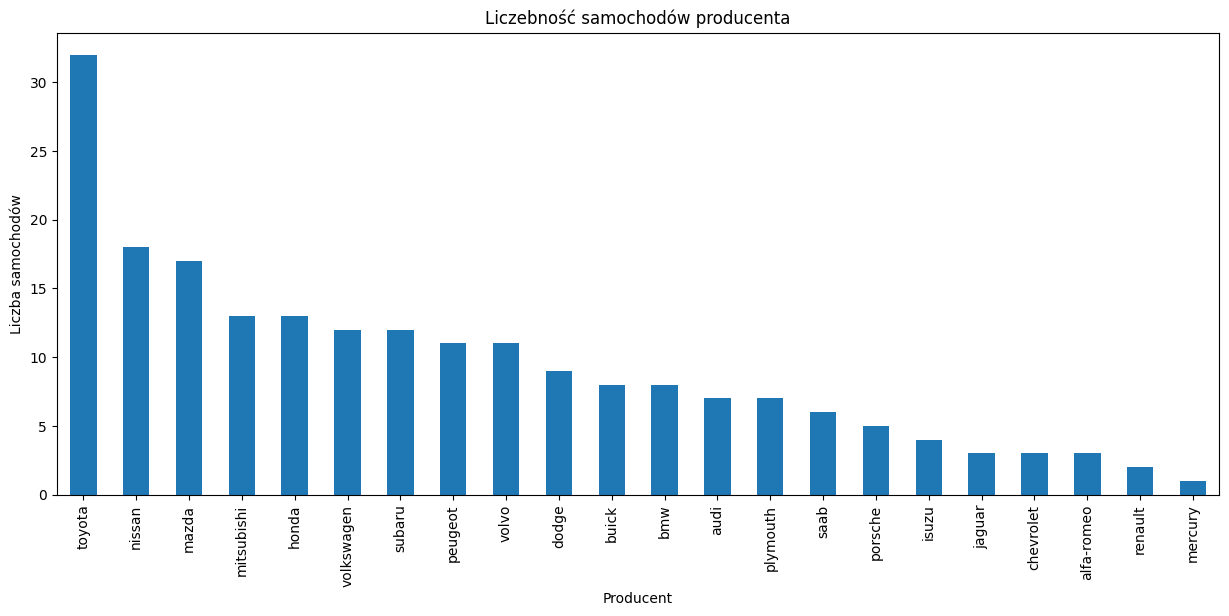

In [25]:
plt.figure(figsize=(15, 6))
data['manufacturer'].value_counts().plot(kind='bar')
plt.title('Liczebność samochodów producenta')
plt.xlabel('Producent')
plt.ylabel('Liczba samochodów')
plt.show()

In [26]:
cat_data = data.select_dtypes(include=['object'])
cat_data.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'manufacturer'],
      dtype='object')

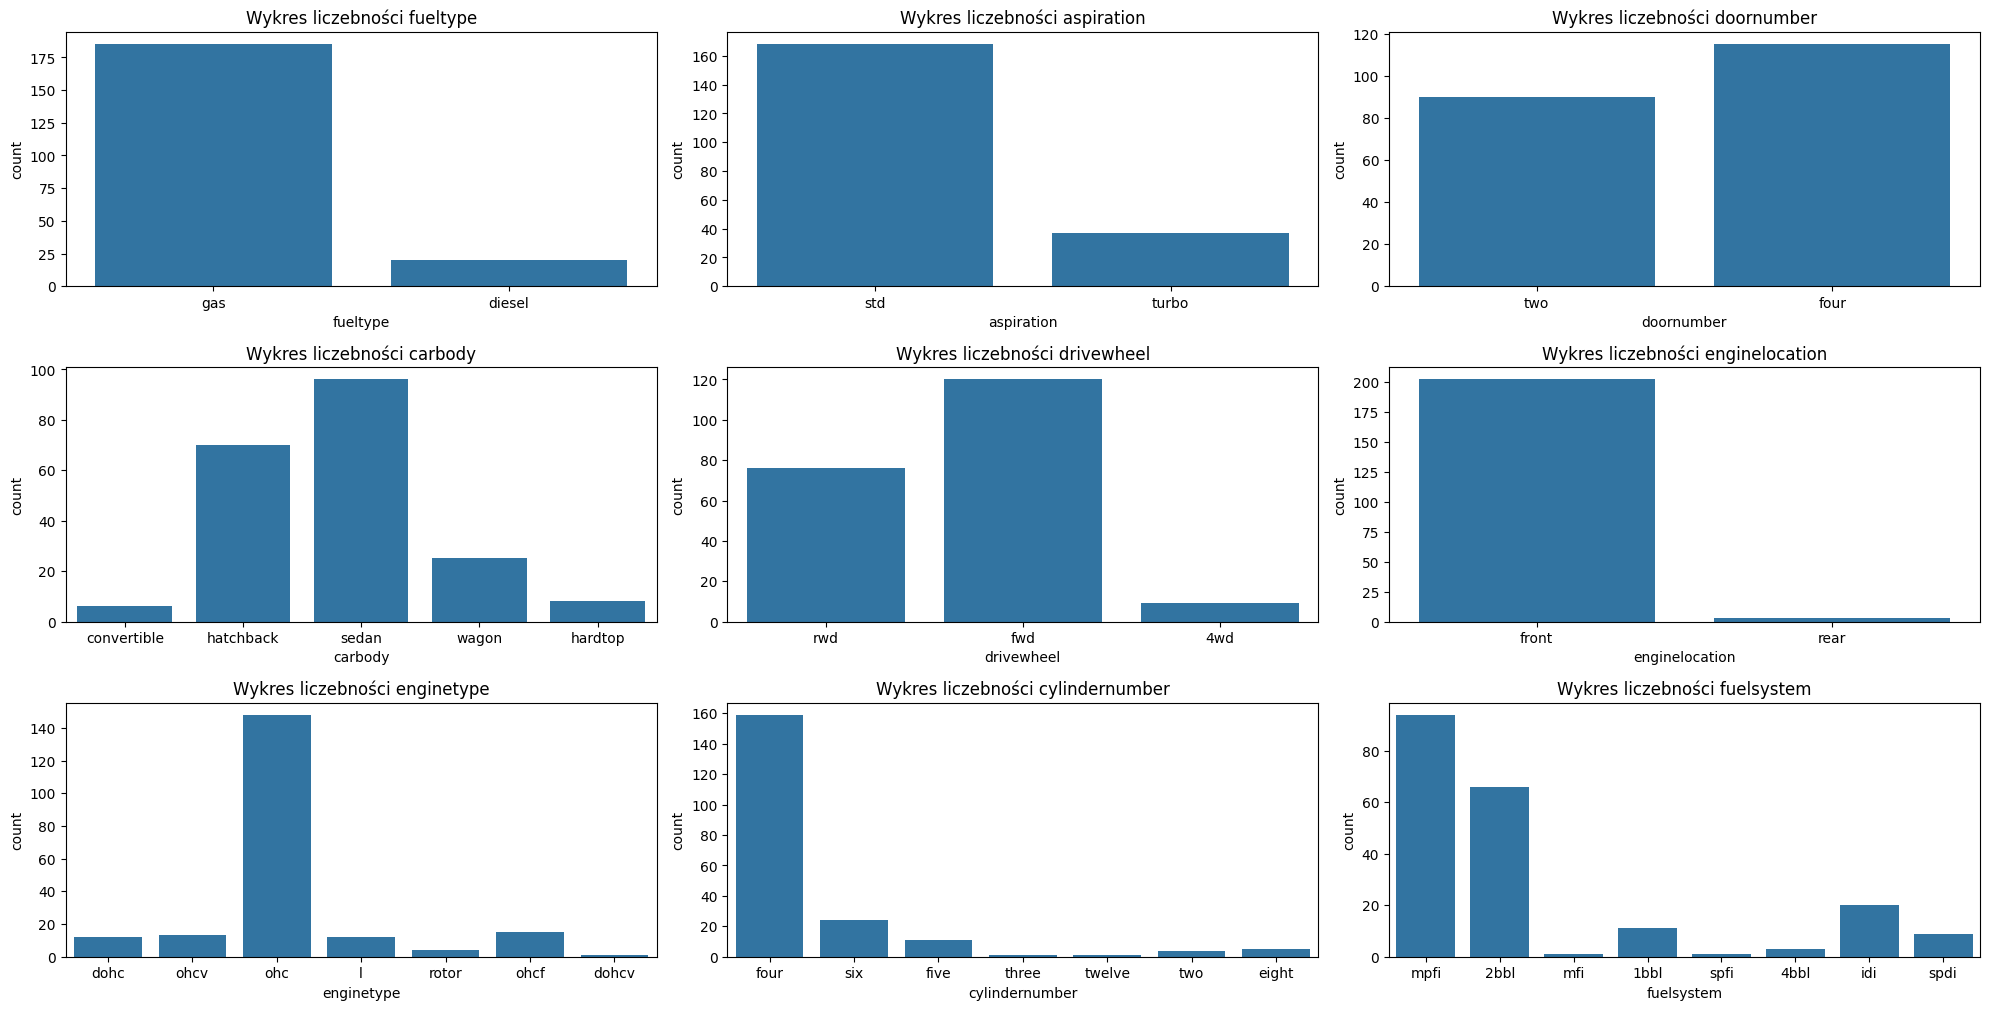

In [28]:
category = data[['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']]
plt.figure(figsize=(20, 50))
for i in range(len(category.columns)):
    plt.subplot(15, 3, i+1)
    sns.countplot(x=category.columns[i], data=category)
    plt.title(f'Wykres liczebności {category.columns[i]}')

plt.tight_layout()
plt.show()

In [29]:
num_data = data.select_dtypes(include=['int64' , 'float64'])
num_data.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

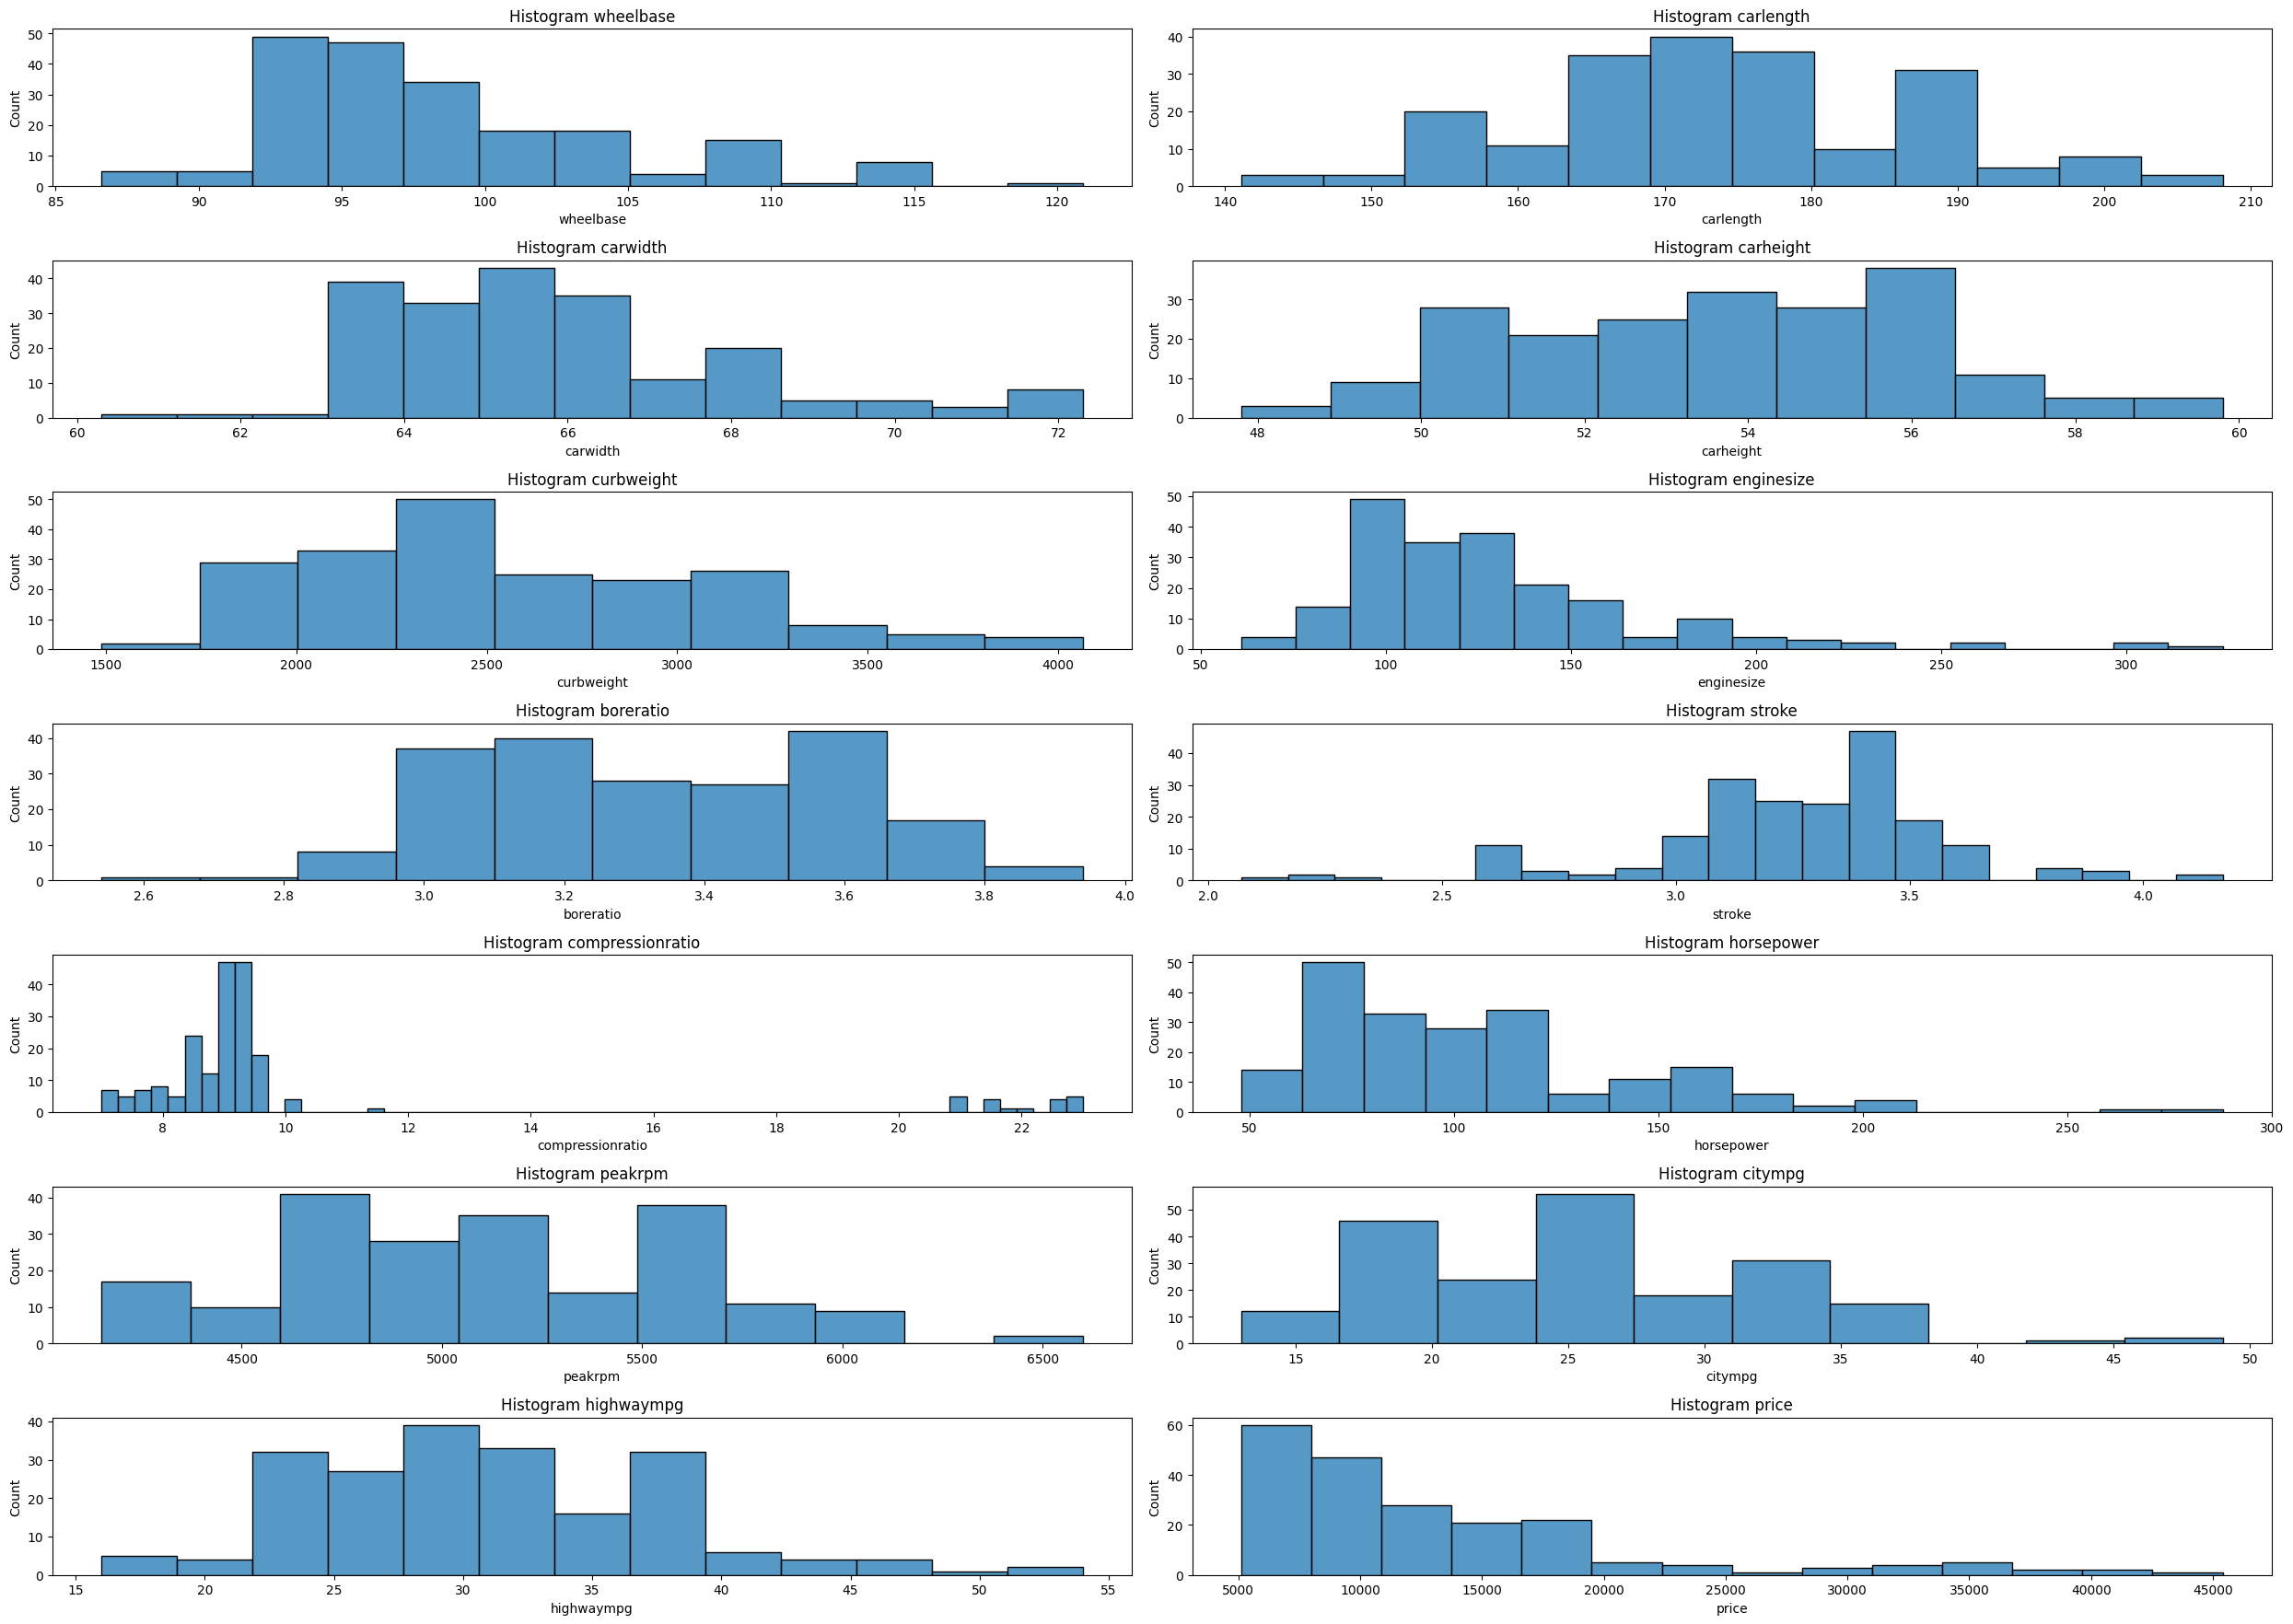

In [31]:
numeric = data[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
plt.figure(figsize=(25, 50))

for i in range(len(numeric.columns)):
    plt.subplot(20 , 2 , i+1)
    sns.histplot(data= numeric , x = numeric.columns[i])
    plt.tight_layout()
    plt.title(f'Histogram {numeric.columns[i]}')

plt.show()

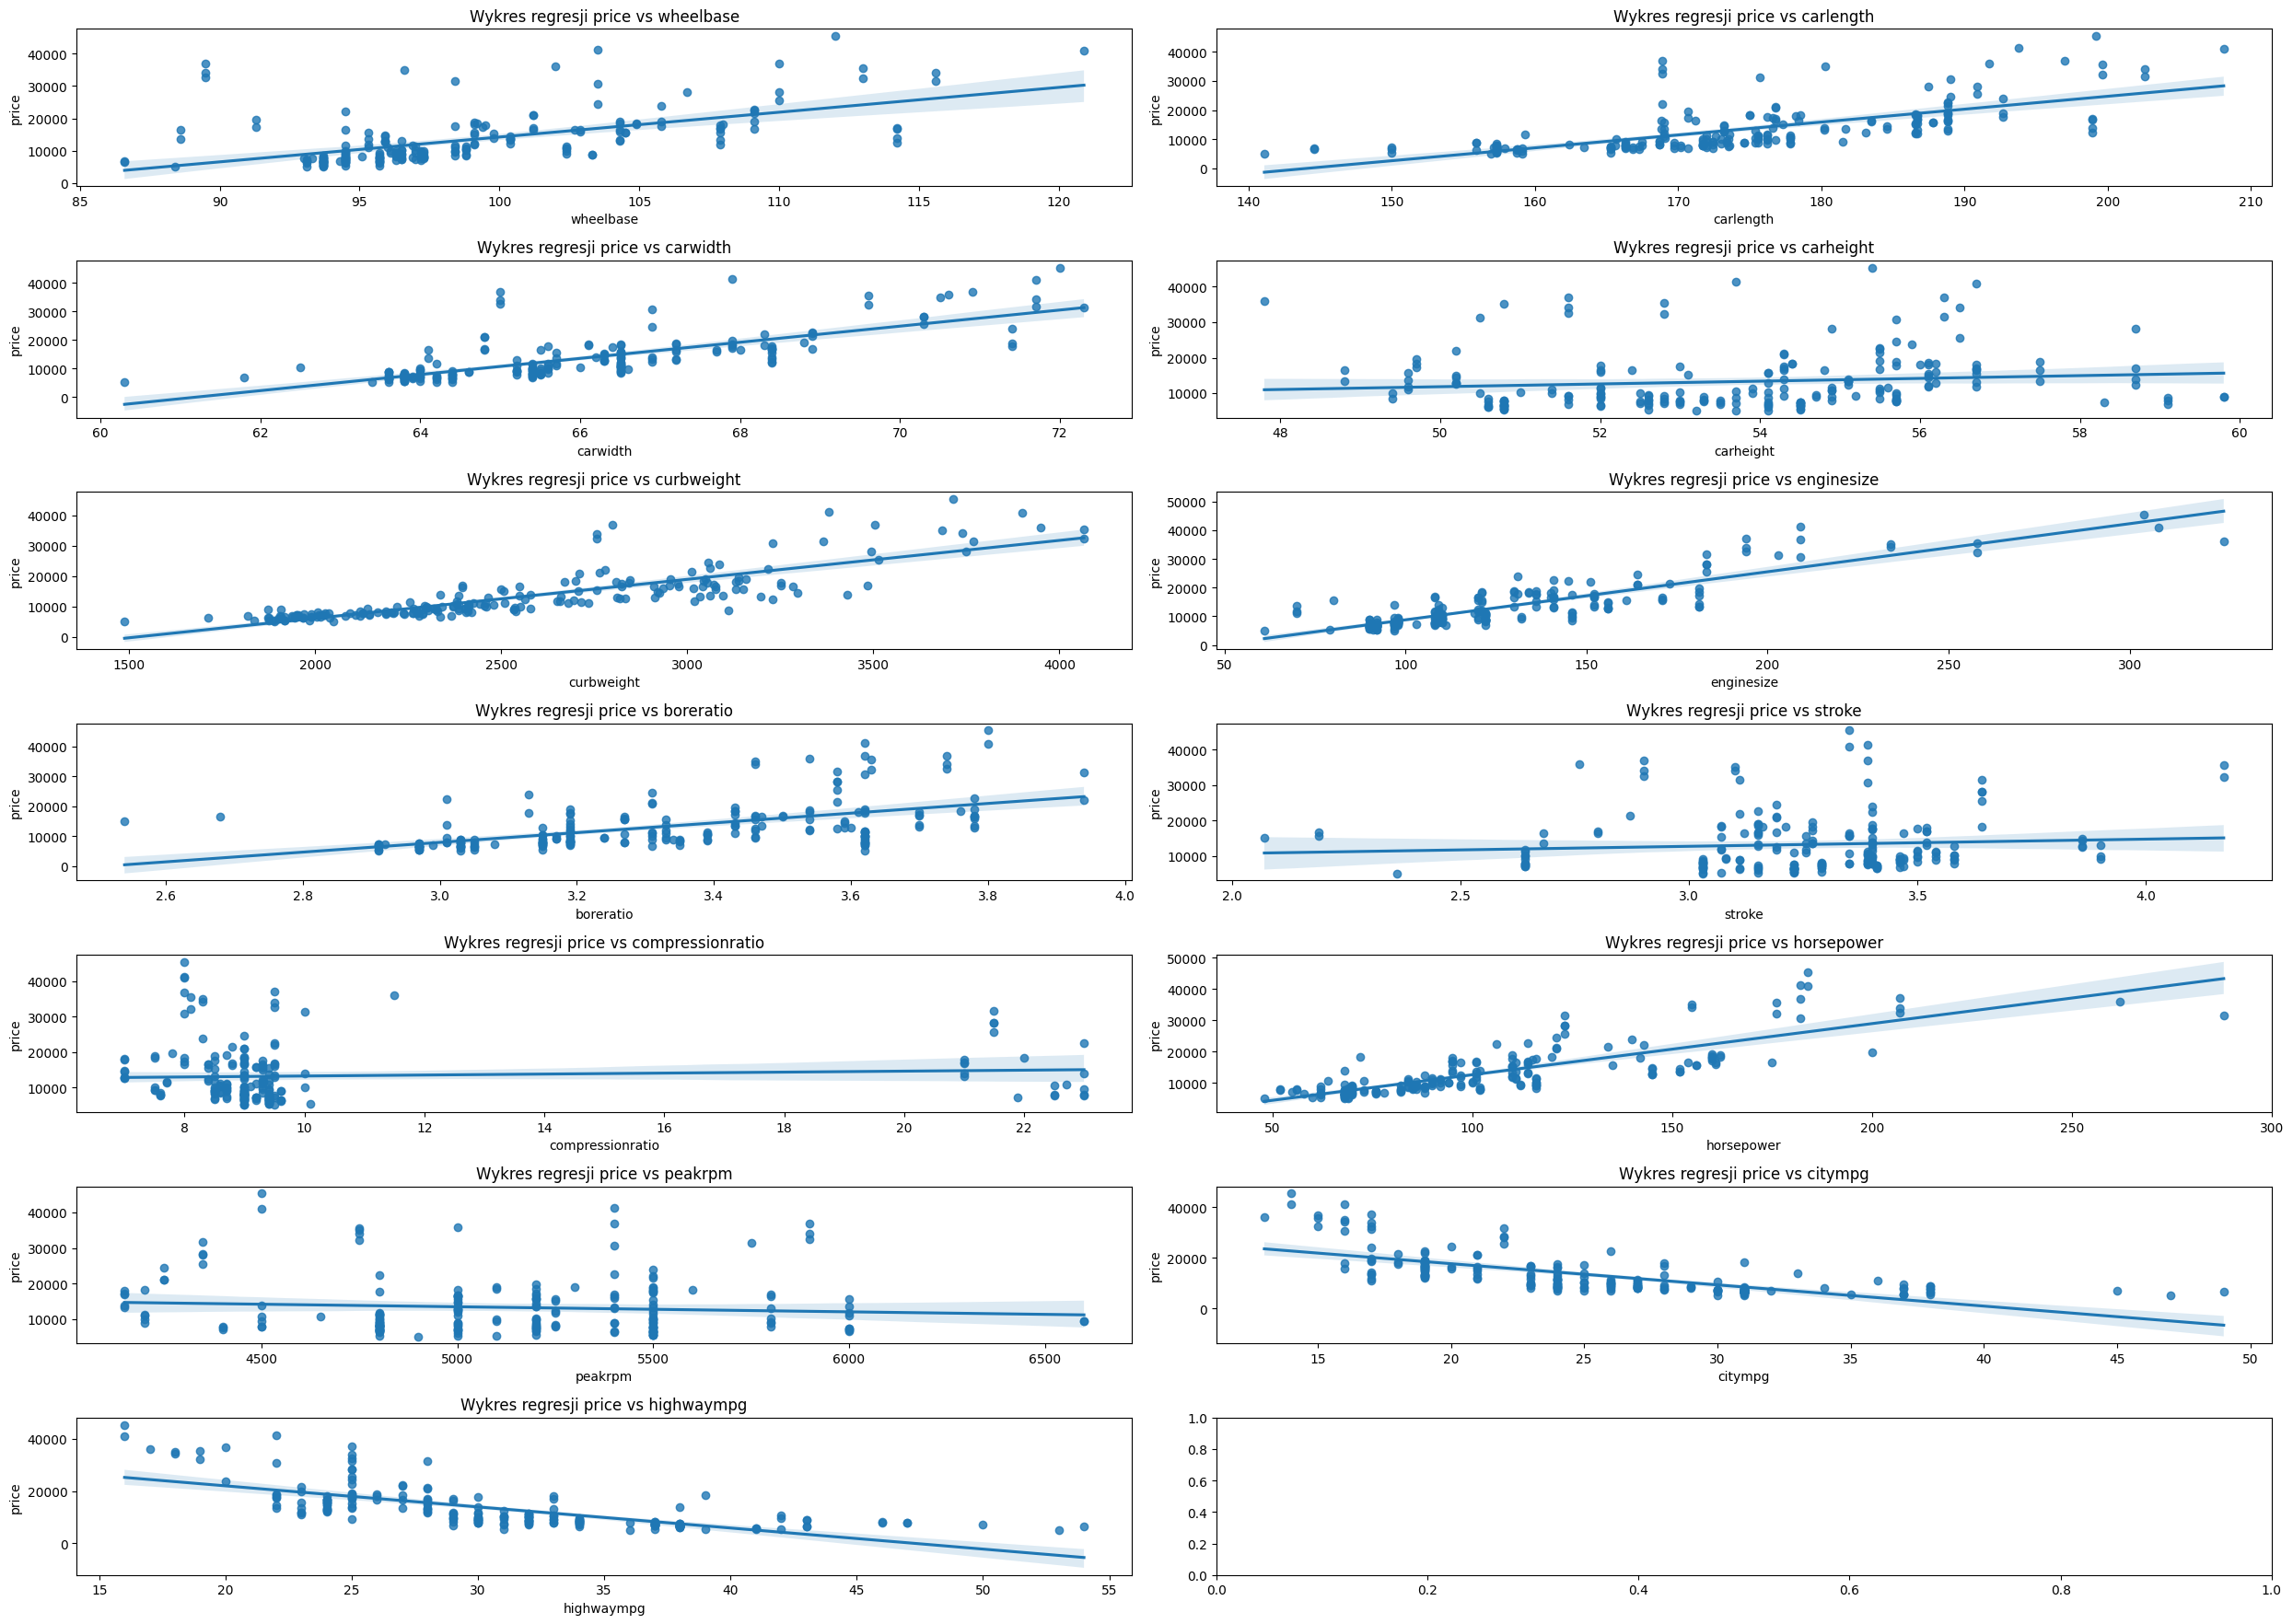

In [37]:
plt.figure(figsize=(25, 50))
for i in range(len(numeric.columns)):
    plt.subplot(20 , 2 , i+1)
    if numeric.columns[i] == 'price':
        continue
    sns.regplot(data= numeric , x = numeric.columns[i] , y='price')
    plt.tight_layout()
    plt.title(f'Wykres regresji price vs {numeric.columns[i]}')

plt.show()

In [85]:
X = data.drop(columns=['car_ID', 'CarName', 'price'])
Y = data['price']

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [87]:
numeric_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
                    'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [88]:
categorical_features = ['manufacturer', 'fueltype', 'aspiration', 'doornumber', 'carbody',
                        'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

X_train_encoded = pd.get_dummies(X_train[categorical_features], drop_first=True)
X_test_encoded = pd.get_dummies(X_test[categorical_features], drop_first=True)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

X_train.drop(columns=categorical_features, inplace=True)
X_test.drop(columns=categorical_features, inplace=True)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes('bool').columns})

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).view(-1, 1).to(device)
y_test_tensor = torch.tensor(Y_test.values, dtype=torch.float32).view(-1, 1).to(device)

In [115]:
input_dim = X_train_tensor.shape[1]

model = nn.Sequential(
    nn.Linear(input_dim, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
).to(device)

In [116]:
learning_rate = 0.001
num_epochs = 1000

In [117]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [118]:
losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/1000], Loss: 241981440.0000
Epoch [20/1000], Loss: 241960608.0000
Epoch [30/1000], Loss: 241895824.0000
Epoch [40/1000], Loss: 241717200.0000
Epoch [50/1000], Loss: 241285264.0000
Epoch [60/1000], Loss: 240355632.0000
Epoch [70/1000], Loss: 238550544.0000
Epoch [80/1000], Loss: 235331936.0000
Epoch [90/1000], Loss: 229995168.0000
Epoch [100/1000], Loss: 221686064.0000
Epoch [110/1000], Loss: 209467360.0000
Epoch [120/1000], Loss: 192477728.0000
Epoch [130/1000], Loss: 170193504.0000
Epoch [140/1000], Loss: 142819008.0000
Epoch [150/1000], Loss: 111712808.0000
Epoch [160/1000], Loss: 79774856.0000
Epoch [170/1000], Loss: 51403348.0000
Epoch [180/1000], Loss: 31220298.0000
Epoch [190/1000], Loss: 21125878.0000
Epoch [200/1000], Loss: 18116068.0000
Epoch [210/1000], Loss: 17244834.0000
Epoch [220/1000], Loss: 16326711.0000
Epoch [230/1000], Loss: 15413616.0000
Epoch [240/1000], Loss: 14655369.0000
Epoch [250/1000], Loss: 13991836.0000
Epoch [260/1000], Loss: 13378145.0000
Epoch 

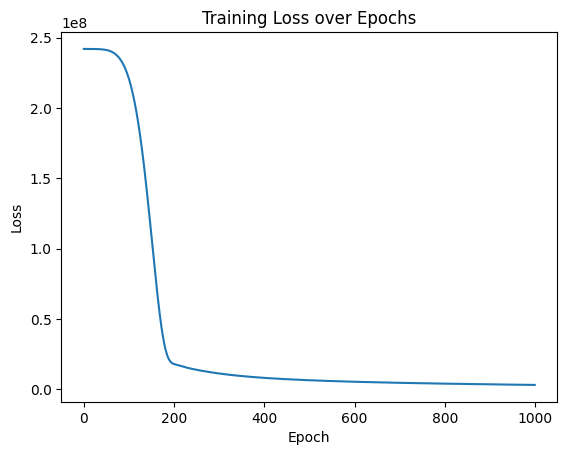

In [119]:
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [120]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    test_outputs_np = test_outputs.cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()
    
    mae = mean_absolute_error(y_test_np, test_outputs_np)
    r2 = r2_score(y_test_np, test_outputs_np)
    
    print(f'Test Loss (MSE): {test_loss.item():.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'R-squared (R²): {r2:.4f}')

Test Loss (MSE): 3251712.5000
Mean Absolute Error (MAE): 1336.6816
R-squared (R²): 0.9524
